<a href="https://colab.research.google.com/github/Jorgemontanez25/Logistic-Regression-Project-Tutorial/blob/main/Logistic_Regression_Project_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

dataframe = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv',delimiter=";")
print(dataframe.shape)
print(dataframe.info())
dataframe.head()

(41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   411

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Por medio de la funcion .info() podemos observar que tipo de varibles tenemos en nuestro dataframe al igual que en esta ocasion pudimos observar que el dataframe no contiene datos nulos, ya que el conteo de los datos no nulos para las variables son iguales a la dimension del dataframe, el cual pudimos ver con la funcion .shape().

Al no contar con datos nulos, podria deducir que este tipo de campaña es solo para personas fisicas y por la naturaleza del problema en el cual esta buscando un enfoque de su campaña hacia clientes existentes para depositos a largo plazo, podria concuir que habria algunas variables las cuales podria descartar ya que no considero que sean relevantes, tal es el caso de las variables tales como emp.var.rate, cons.price.idx,cons.conf.idx, eribor3m y nr.employed

*Eliminacion de variables consideradas no relevantes*

In [2]:
dataframe.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [3]:
dataframe.drop(['emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1,inplace=True)
print(dataframe.shape)
print(dataframe.info())
dataframe.head()

(41188, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41188 non-null  int64 
 1   job          41188 non-null  object
 2   marital      41188 non-null  object
 3   education    41188 non-null  object
 4   default      41188 non-null  object
 5   housing      41188 non-null  object
 6   loan         41188 non-null  object
 7   contact      41188 non-null  object
 8   month        41188 non-null  object
 9   day_of_week  41188 non-null  object
 10  duration     41188 non-null  int64 
 11  campaign     41188 non-null  int64 
 12  pdays        41188 non-null  int64 
 13  previous     41188 non-null  int64 
 14  poutcome     41188 non-null  object
 15  y            41188 non-null  object
dtypes: int64(5), object(11)
memory usage: 5.0+ MB
None


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,no


*Drop duplicades*

In [4]:
dataframe = dataframe.drop_duplicates().reset_index(drop = True)
print(dataframe.shape)
dataframe.head()

(41175, 16)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,no


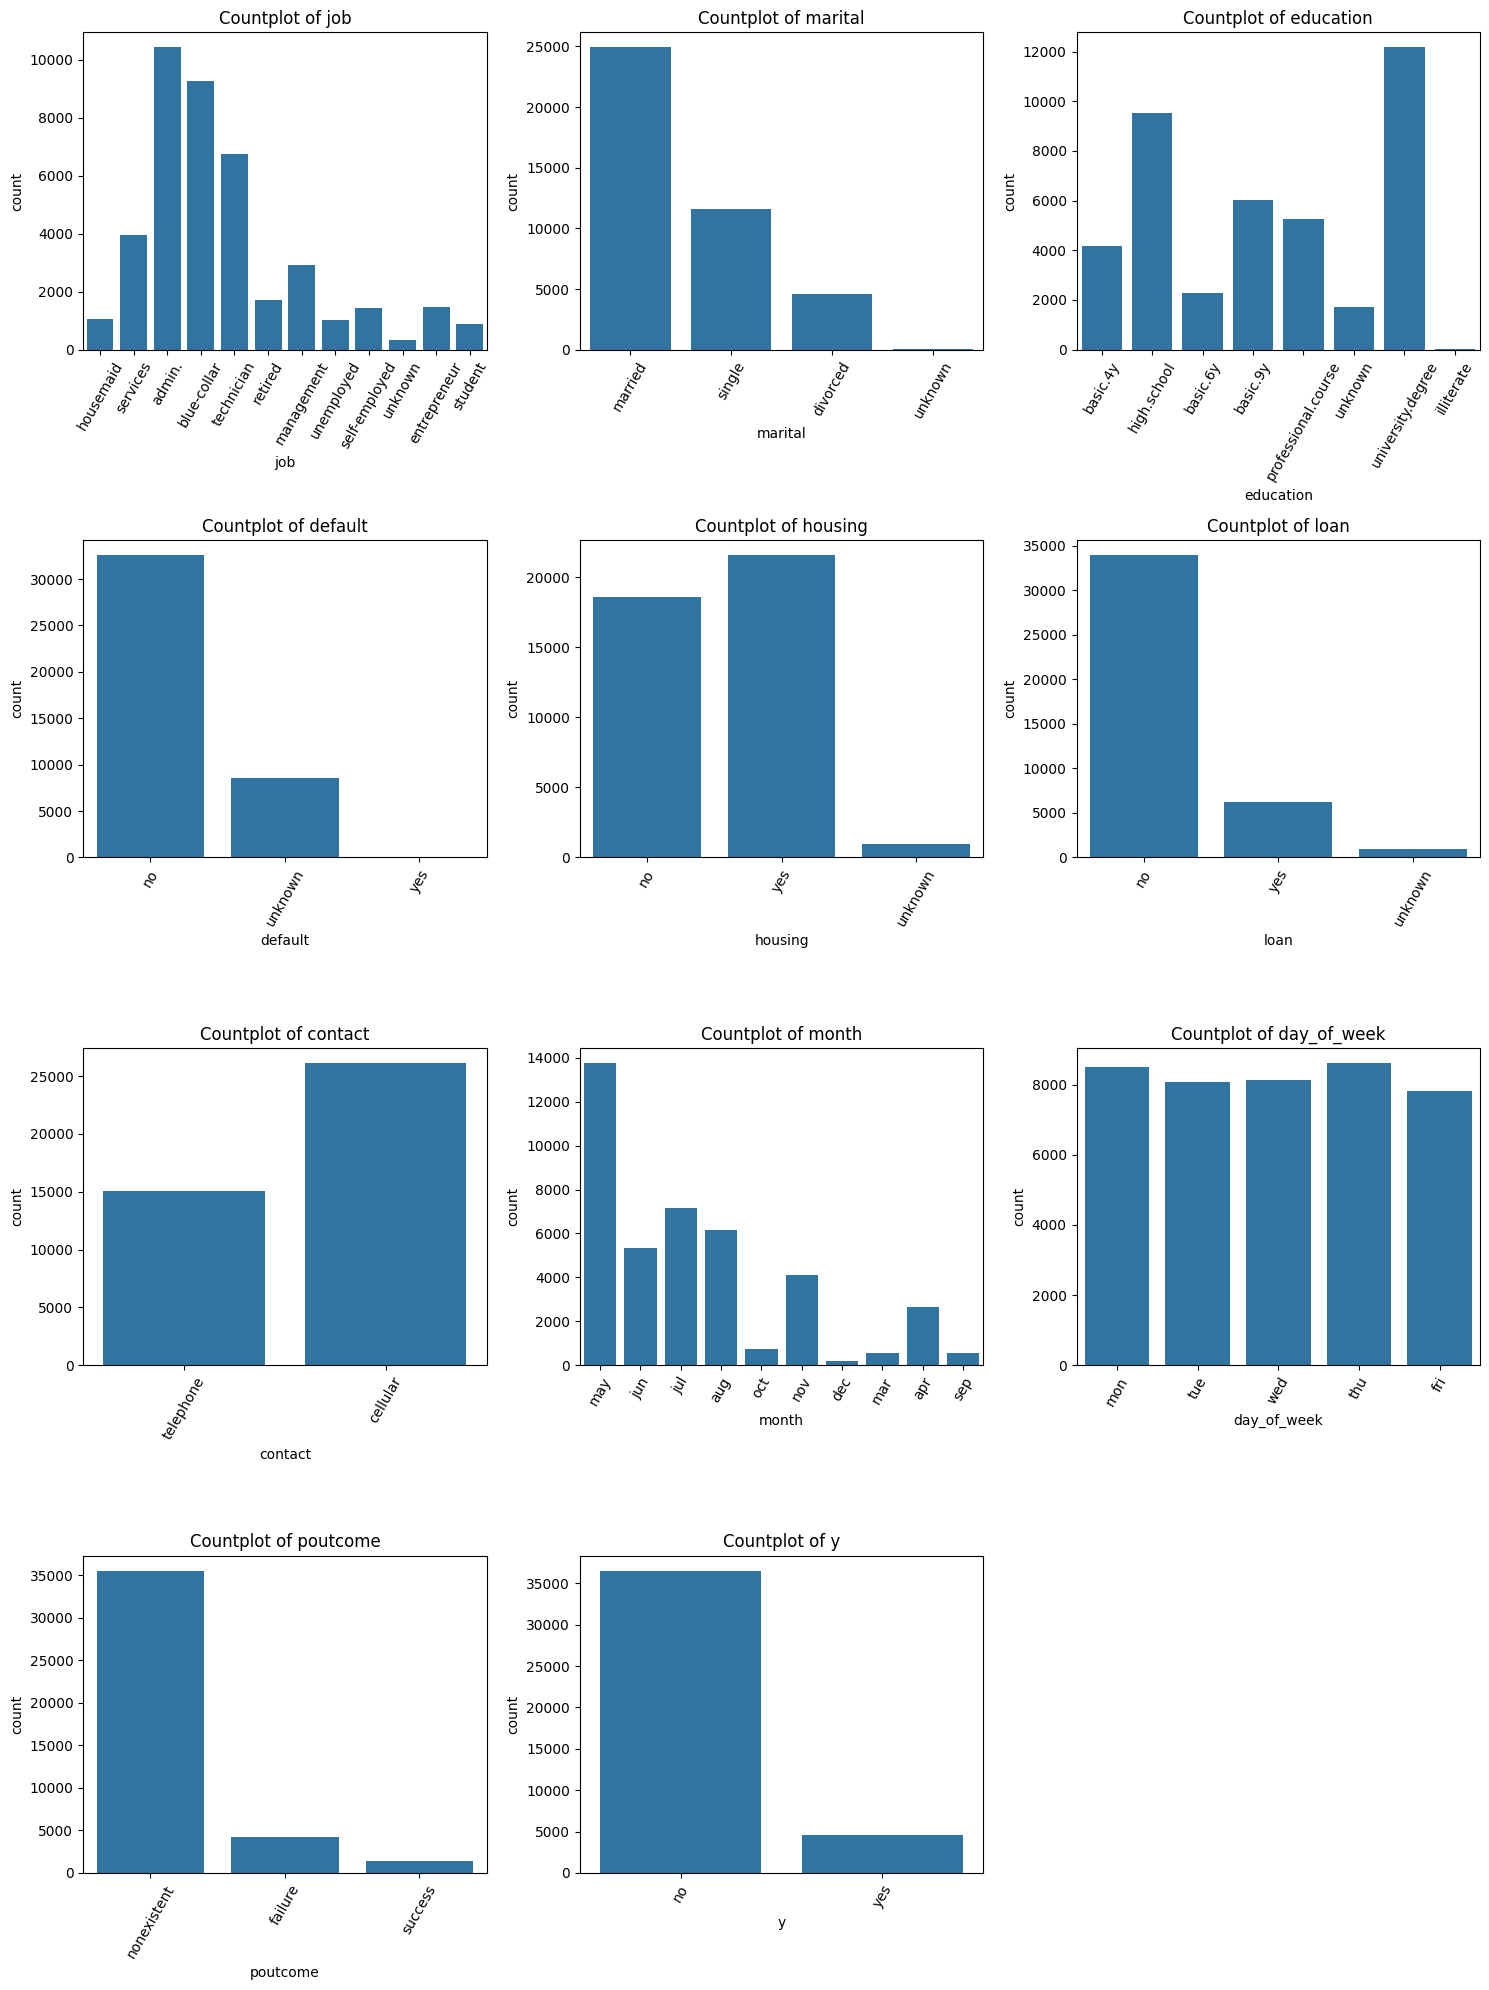

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with the categorical variables
fig, axes = plt.subplots(4, 3, figsize=(15, 20))

categorical_variables = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome", "y"]

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(categorical_variables):
    sns.countplot(x=col, data=dataframe, ax=axes[i])
    axes[i].set_title(f'Countplot of {col}')
    axes[i].tick_params(axis='x', rotation=60)

fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()





A traves de las graficas podemos observar que a pesar de no tener variables nulas si contamos con valores desconocidos y/o no existentes. Entre lo mas claro que podemos encontrar en el las variables del dataframe es lo siguiente:
*   Los trabajos mas frecuentes en los clientes son administracion, blue-collar y tecnicos en ese orden.
*   Un alto porcentaje de los clientes estan casados.
*   Un alto porcentaje de la escolaridad de los clientes son de universidad y preparatoria en ese orden.
*   practicamente ningun cliente tiene credito o por lo menos es desconocido, y por parte de prestamos personal en su gran mayoria no tienen prestamo personal.
*   El mes de Mayo es el mes con mayor numero de contacto a clientes.
*   Los resultados de la campaña anterior en su gran mayoria no existen, seguido por fallo en la campaña y muy poco porcentaje de exito.
*   Como resultado de lo anterior una gran mayoria de los clientes no tienen depositos a largo plazo









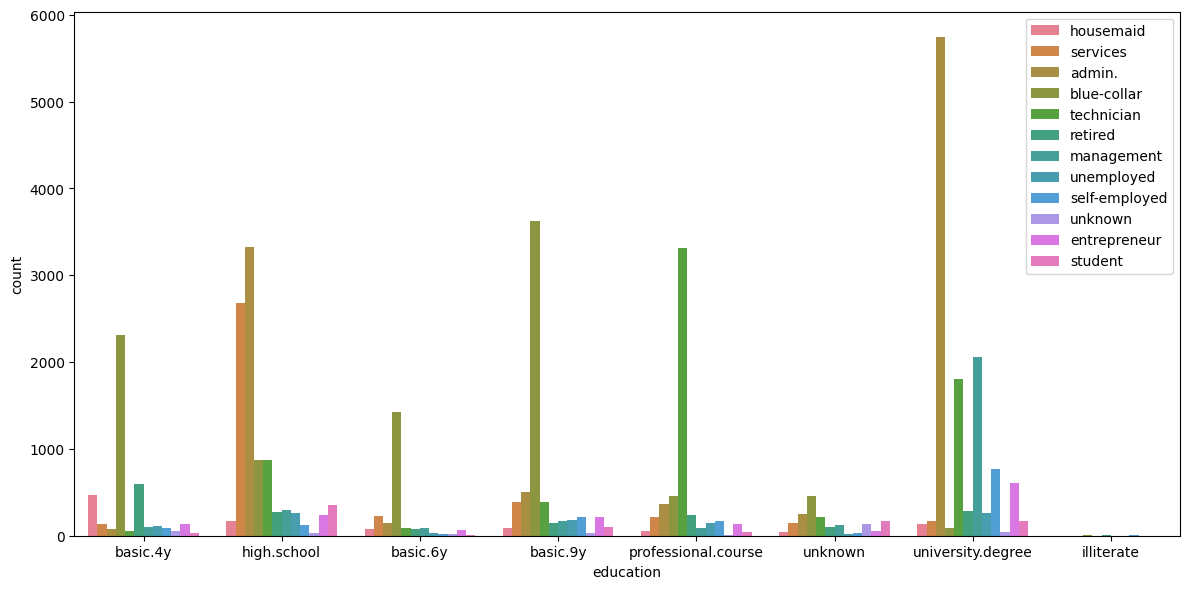

In [6]:
plt.figure(figsize=(12,6))
sns.countplot(data=dataframe,x='education',hue='job')
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

En la grafica que tenemos en la parte superior pomeos ver la distribucion de las posiciones laborales con la educacion que tienen los clientes, notando que los puestos administrativos en su gran mayoria se encuentran en las personas con estudios universitarios, blue-collar en los que se encuentran en basic.9y y los tecnicos en los que se encuentran en professional.course.

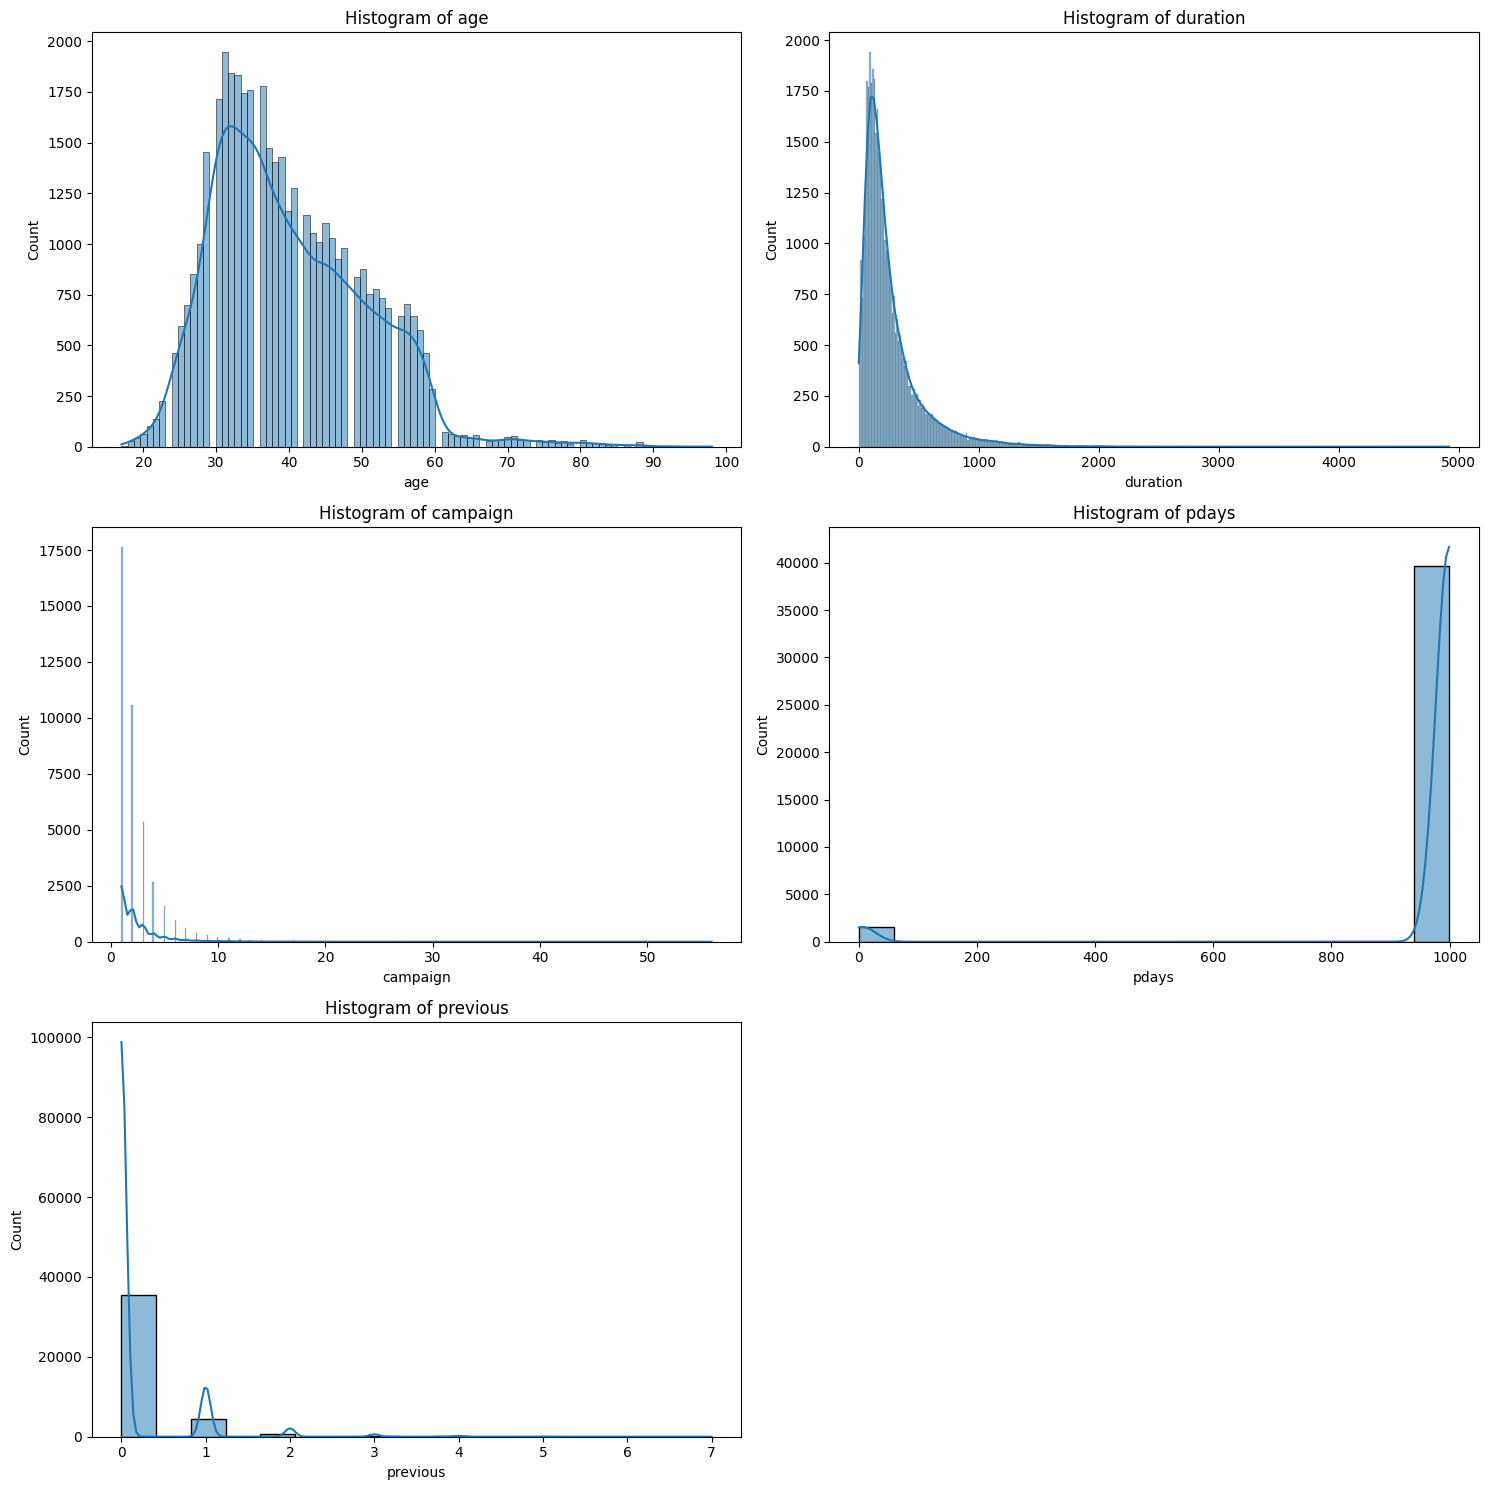

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'dataframe' is your DataFrame containing the numerical and dependent variables
numerical_var= ['age', 'duration', 'campaign', 'pdays', 'previous']

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each numerical variable
for i, col in enumerate(numerical_var):
    sns.histplot(data=dataframe, x=col, ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {col}')



fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()


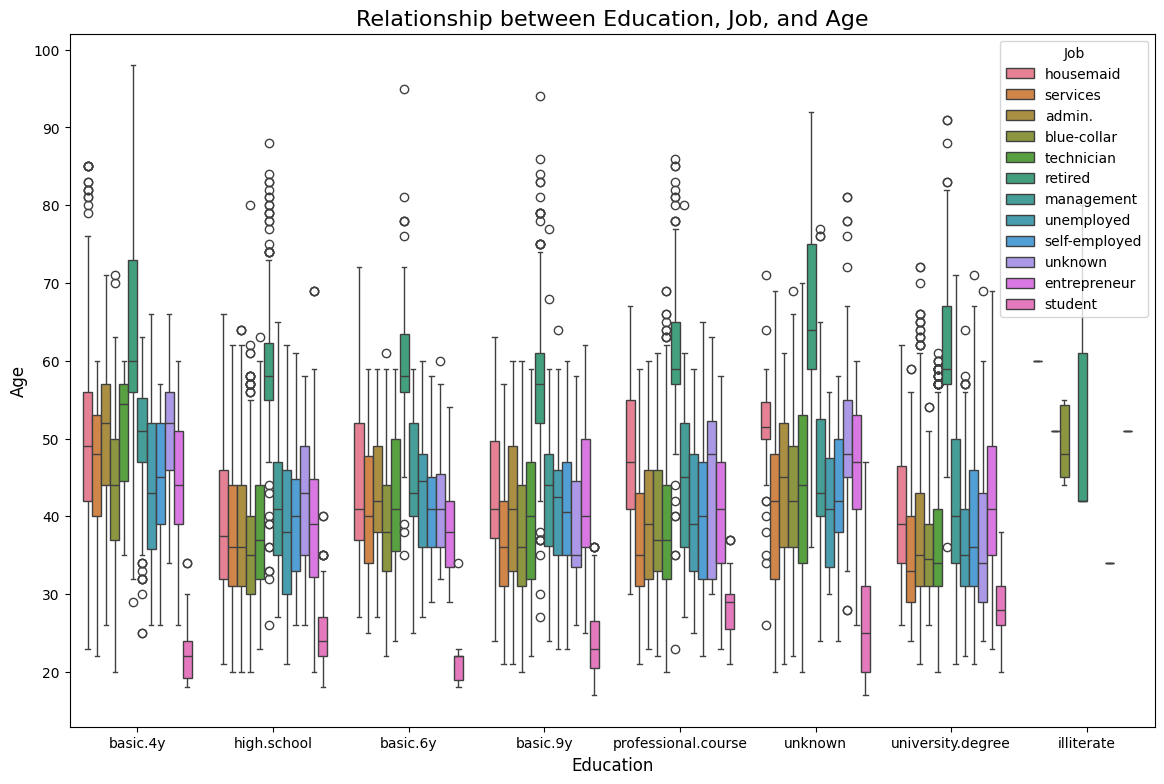

In [8]:
plt.figure(figsize=(14, 9))  # Tamaño del gráfico
sns.boxplot(data=dataframe, x='education', y='age', hue='job')
plt.xlabel('Education', fontsize=12)  # Etiqueta para el eje x
plt.ylabel('Age', fontsize=12)  # Etiqueta para el eje y
plt.title('Relationship between Education, Job, and Age', fontsize=16)  # Título
plt.legend(title='Job', loc='upper right')  # Alinear la leyenda a la derecha
plt.show()

*Conversion de variables categoricas a numericas*

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Define the categorical variables to be factorized
categorical_variables = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome", "y"]

# Factorize categorical variables and add them as new columns
for column in categorical_variables:
    dataframe[f"{column}_n"] = pd.factorize(dataframe[column])[0]

# Define numerical variables along with the categorical ones
num_variables = ["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n",
                 "month_n", "day_of_week_n", "poutcome_n","y_n", "age", "duration", "campaign", "pdays",
                 "previous"]

# Scale numerical variables using MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(dataframe[num_variables])

# Create a DataFrame with scaled features
dataframe_scal = pd.DataFrame(scaled_features, index=dataframe.index, columns=num_variables)


# Display the first few rows of the scaled DataFrame
dataframe_scal.head()


,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n,age,duration,campaign,pdays,previous
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.481481,0.053070,0.0,1.0,0.0
1,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.493827,0.030297,0.0,1.0,0.0
2,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.246914,0.045954,0.0,1.0,0.0
3,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.283951,0.030704,0.0,1.0,0.0
4,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.481481,0.062424,0.0,1.0,0.0


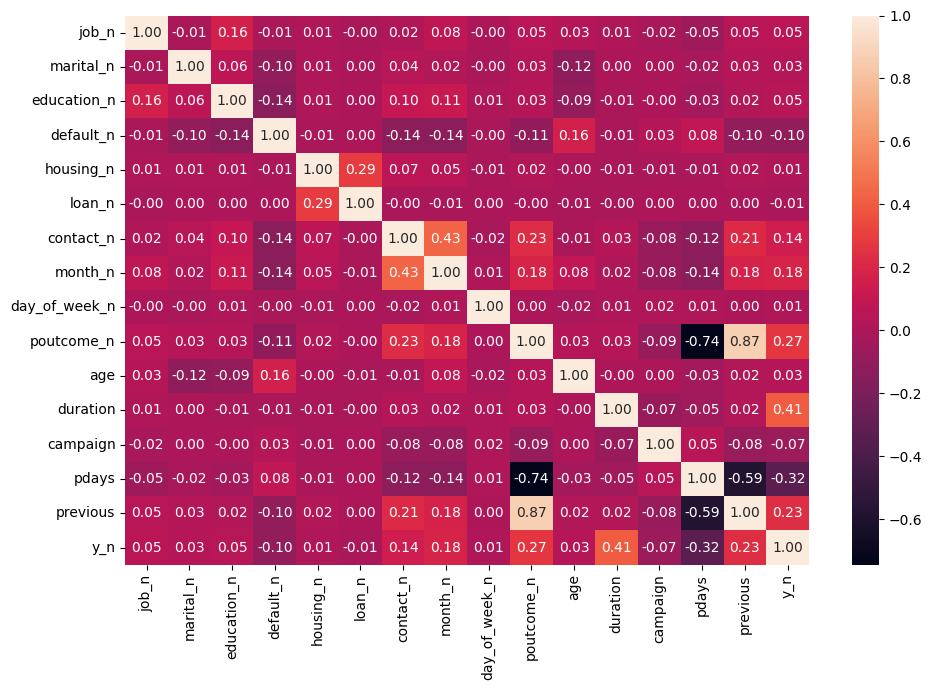

In [10]:
plt.figure(figsize=(10,7))

sns.heatmap(dataframe[["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n",
                 "month_n", "day_of_week_n", "poutcome_n", "age", "duration", "campaign", "pdays",
                 "previous","y_n"]].corr(), annot=True, fmt='.2f')

plt.tight_layout()

plt.show()

En el heatmap podemos observar que las relaciones mas grandes con nuestra variable dependiente y son del 41% con la variable duration, entendible ya que mientras mayor duracion en la llamada se podria decir que mayor interes del cliente; con el 27% poutcome, que igual tiene sentido ya tomando en cuenta el resultado de la campaña anterior pueden utilizar la misma estrategia con los clientes que si aceptaron; con un 23% la variable que hace referencia al numero de contactos que se le tuvo con los clientes en la campaña anterior, con la cual podrian sacar la relacion por cliente del numero de contactos que necesitaron realizar para poder tener exito;y por ultimo una relacion de -32% con la variable pday, referente a los dias trascurridos entre la campaña previa hasta el momento de ser contactado, aqui la relacion cobra peso para saber si mientras menor sea el tiempo la taza de rechazo o exito es mayor.

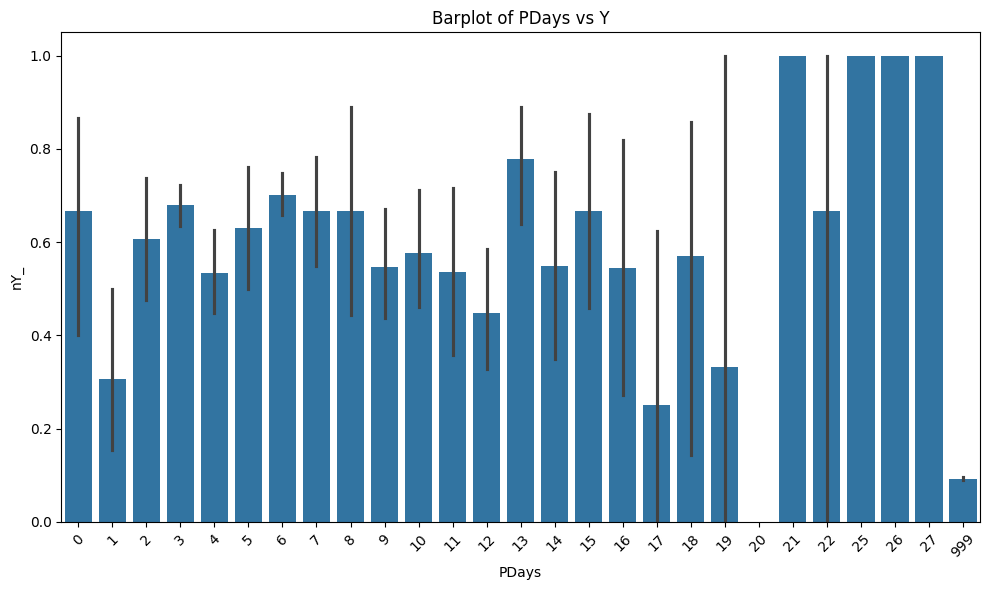

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(data=dataframe, x='pdays', y='y_n')
plt.xlabel('PDays')
plt.ylabel('nY_')
plt.title('Barplot of PDays vs Y')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

A los clientes que contactaron en los dias 21,25,26 y 27 lograban con exito que contratara un deposito a largo plazo

In [12]:
#Import libraries
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

#Separating dependent variable from independent variables
X = dataframe_scal.drop("y_n", axis = 1)
y = dataframe_scal["y_n"]

#Split the data into training data and test data (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#selection model using chi2 scoring function and k=5 for the top 5 features that are most likely to be relevant to the target variable.
selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train, y_train)
#This mask (ix) is used to filter the original feature set, selecting only the top 5 features.
ix = selection_model.get_support()
#The selected features are transformed for both the training and testing datasets using the transform method of the selection model.
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,contact_n,month_n,poutcome_n,duration,previous
0,0.0,0.222222,0.0,0.058154,0.0
1,1.0,0.222222,0.0,0.001627,0.0
2,1.0,0.000000,0.0,0.041277,0.0
3,0.0,0.000000,0.0,0.027450,0.0
4,1.0,0.333333,0.0,0.084181,0.0


In [13]:
X_test_sel.head()

,contact_n,month_n,poutcome_n,duration,previous
0,1.0,0.555556,0.5,0.076861,0.142857
1,1.0,0.000000,0.0,0.015453,0.000000
2,1.0,0.333333,0.0,0.017893,0.000000
3,1.0,0.000000,0.0,0.127898,0.000000
4,0.0,0.000000,0.0,0.057747,0.000000


In [14]:
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)


In [15]:
X_train_sel.to_csv("clean_train.csv",index=False)
X_test_sel.to_csv("clean_test.csv",index=False)

In [16]:
train_data = pd.read_csv("clean_train.csv")
test_data = pd.read_csv("clean_test.csv")

train_data.head()

,contact_n,month_n,poutcome_n,duration,previous,y_n
0,0.0,0.222222,0.0,0.058154,0.0,0.0
1,1.0,0.222222,0.0,0.001627,0.0,0.0
2,1.0,0.000000,0.0,0.041277,0.0,0.0
3,0.0,0.000000,0.0,0.027450,0.0,0.0
4,1.0,0.333333,0.0,0.084181,0.0,0.0


In [17]:
test_data.head()

,contact_n,month_n,poutcome_n,duration,previous,y_n
0,1.0,0.555556,0.5,0.076861,0.142857,0.0
1,1.0,0.000000,0.0,0.015453,0.000000,0.0
2,1.0,0.333333,0.0,0.017893,0.000000,0.0
3,1.0,0.000000,0.0,0.127898,0.000000,0.0
4,0.0,0.000000,0.0,0.057747,0.000000,0.0


In [18]:
X_train = train_data.drop(["y_n"], axis = 1)
y_train = train_data["y_n"]
X_test = test_data.drop(["y_n"], axis = 1)
y_test = test_data["y_n"]

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8955676988463873

*Grid Search*


In [23]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [24]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}


In [25]:
model = LogisticRegression(C = 0.1, penalty = "l1", solver = "saga")
model.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='saga')

In [26]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [27]:
accuracy_score(y_test, y_pred)

0.8954462659380692

*Randomized Search*

In [28]:
from sklearn.model_selection import RandomizedSearchCV

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

random_search = RandomizedSearchCV(model, hyperparams, scoring="accuracy", cv=10, n_iter=10)
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'solver': 'saga', 'penalty': None, 'C': 0.001}
Best Score: 0.9000910746812385


In [30]:
model = LogisticRegression(C = 0.001, penalty = None, solver = "saga")
model.fit(X_train, y_train)

LogisticRegression(C=0.001, penalty=None, solver='saga')

In [31]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [32]:
accuracy_score(y_test, y_pred)

0.8959319975713418

En ambos modelos tanto el Grid Search como el Random Search tenemos un accuracy del 89.5%, si aumentamos el numero de decimales, levemente el modelo Rando Search nos dio mejor resultado conun 89.59% a comparacion del 89.54% de grid search, lo cual podriamos interpretar como que de los 41188 clientes con los que cuenta el banco portuguese el modelo puedo predecir de manera  eficiente a 36768 ya se que contrate o no un deposito a largo plazo.

In [27]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [28]:
!mkdir -p /content/drive/MyDrive/models

In [29]:
from pickle import dump

# Specify the file path within your Google Drive
file_path = '/content/drive/MyDrive/models/logistic_regression_model.sav'

# Serialize and save the model to Google Drive
dump(model, open(file_path, "wb"))
